In [1]:
'''
https://www.kaggle.com/asindico/customer-segments 검토

1. 
주어진 데이터가 여러 csv 파일로 저장되어 있음.
이 파일들을 적절히 merge 해서 하나의 matrix 생성.
order_prior = pd.merge(prior, orders, on=['order_id','order_id'])
_mt = pd.merge(prior, products, on = ['product_id', 'product_id'])
_mt = pd.merge(_mt, orders, on = ['order_id', 'order_id'])
mt = pd.merge(_mt, aisles, on = ['aisle_id', 'aisle_id'])
최종 mt 변수를 사용.

'''

"\nhttps://www.kaggle.com/asindico/customer-segments 검토\n\n1. 주어진 데이터가 여러 csv 파일로 저장되어 있음.\n이 파일들을 적절히 merge 해서 하나의 matrix 생성.\norder_prior = pd.merge(prior, orders, on=['order_id','order_id'])\n_mt = pd.merge(prior, products, on = ['product_id', 'product_id'])\n_mt = pd.merge(_mt, orders, on = ['order_id', 'order_id'])\nmt = pd.merge(_mt, aisles, on = ['aisle_id', 'aisle_id'])\n최종 mt 변수를 사용.\n\n"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



In [4]:
orders = pd.read_csv('./input/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
prior = pd.read_csv('./input/order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
train = pd.read_csv('./input/order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
order_prior = pd.merge(prior, orders, on=['order_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [8]:
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head(100)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4089398,431534,196,1,1,1,prior,5,4,15,28.0
4089399,431534,12427,2,1,1,prior,5,4,15,28.0
4089400,431534,10258,3,1,1,prior,5,4,15,28.0
4089401,431534,25133,4,1,1,prior,5,4,15,28.0
4089402,431534,10326,5,0,1,prior,5,4,15,28.0
4089403,431534,17122,6,0,1,prior,5,4,15,28.0
4089404,431534,41787,7,0,1,prior,5,4,15,28.0
4089405,431534,13176,8,1,1,prior,5,4,15,28.0
4488095,473747,196,1,1,1,prior,3,3,12,21.0
4488096,473747,12427,2,1,1,prior,3,3,12,21.0


In [9]:
products = pd.read_csv('./input/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
aisles = pd.read_csv('./input/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
_mt = pd.merge(prior, products, on = ['product_id', 'product_id'])
_mt = pd.merge(_mt, orders, on = ['order_id', 'order_id'])
mt = pd.merge(_mt, aisles, on = ['aisle_id', 'aisle_id'])
mt.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs


In [12]:
'''
2. 
user_id와 aisle(아마도 세부 상품에 대한 상위 카테고리 쯤 나타내는 듯) cross table을 사용.
Cross table은 엑셀의 필터 기능과 유사함

cust_prod 변수를 가지고 pca를 함.
pca에서 6번째까지 eigenvector 사용
이 중, 1번째와 4번째만 사용... (특별한 이유는 없음. 그냥 해봤는데 잘 되서 선택함.)

'''

'\n2. \nuser_id와 aisle(아마도 세부 상품에 대한 상위 카테고리 쯤 나타내는 듯) cross table을 사용.\nCross table은 엑셀의 필터 기능과 유사함\n\ncust_prod 변수를 가지고 pca를 함.\npca에서 6번째까지 eigenvector 사용\n이 중, 1번째와 4번째만 사용... (특별한 이유는 없음. 그냥 해봤는데 잘 되서 선택함.)\n\n'

In [13]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [15]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-24.215659,2.429427,-2.466372,-0.145702,0.268904,-1.432050
1,6.463208,36.751116,8.382554,15.097522,-6.920870,-0.978646
2,-7.990302,2.404383,-11.030064,0.672225,-0.442379,-2.823197
3,-27.991129,-0.755823,-1.921732,2.091887,-0.288226,0.926147
4,-19.896394,-2.637225,0.533229,3.679231,0.612827,-1.624054


(32434489, 14)
(206209, 134)
(206209, 6)
(206209, 6)
(206209, 2)
          4          1
0  0.268904   2.429427
1 -6.920870  36.751116
2 -0.442379   2.404383
3 -0.288226  -0.755823
4  0.612827  -2.637225


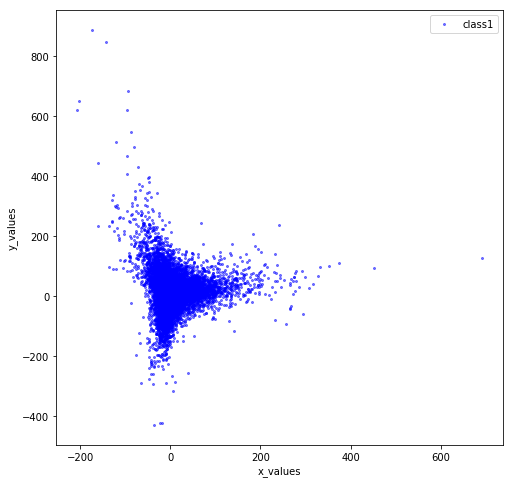

In [16]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])

print (mt.shape)
print (cust_prod.shape)
print (ps.shape)
print (pca_samples.shape)
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [17]:
'''
3. 
이 후 클러스팅을 함.
k = 4 인 k-means 알고리즘 실행.

클러스터링을 한 이유는 정확히 모르겠으나, 
아마도 각 클래스에 대한 최대 판매 상품을 알고 싶은 걸로 생각됨.
예를 들어, 1번 클래스의 사용자는 fresh fruits(29.581621)를
살 확률이 많다고 생각할 수 있음.

'''

'\n3. \n이 후 클러스팅을 함.\nk = 4 인 k-means 알고리즘 실행.\n\n클러스터링을 한 이유는 정확히 모르겠으나, \n아마도 각 클래스에 대한 최대 판매 상품을 알고 싶은 걸로 생각됨.\n예를 들어, 1번 클래스의 사용자는 fresh fruits(29.581621)를\n살 확률이 많다고 생각할 수 있음.\n\n\n'

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ -0.11868767   0.09644088]
 [-11.26759786  65.248165  ]
 [ -4.71389303 -40.63421033]
 [ 76.82336471  26.26358547]]


In [19]:
print(c_preds[0:100])

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 1 0 0 0 0 0 0 0 0 0 0]


['orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


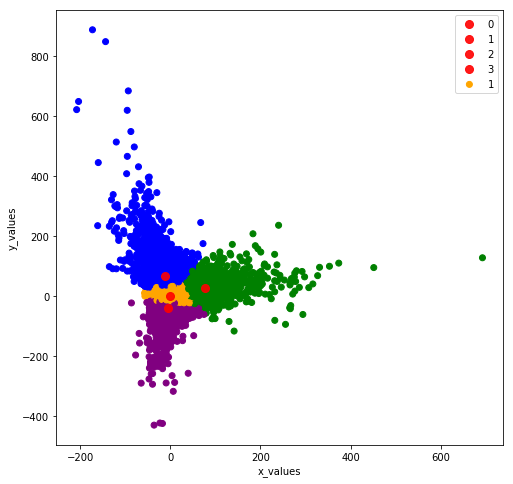

In [20]:
import matplotlib
fig = plt.figure(figsize = (8,8))
colors = ['orange', 'blue', 'purple', 'green']
colored = [colors[k] for k in c_preds]
print(colored[0:10])
plt.scatter(tocluster[4], tocluster[1], color = colored)
for ci, c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize = 8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [21]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds
clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,5,0
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,2,0,19,0


(206209, 135)


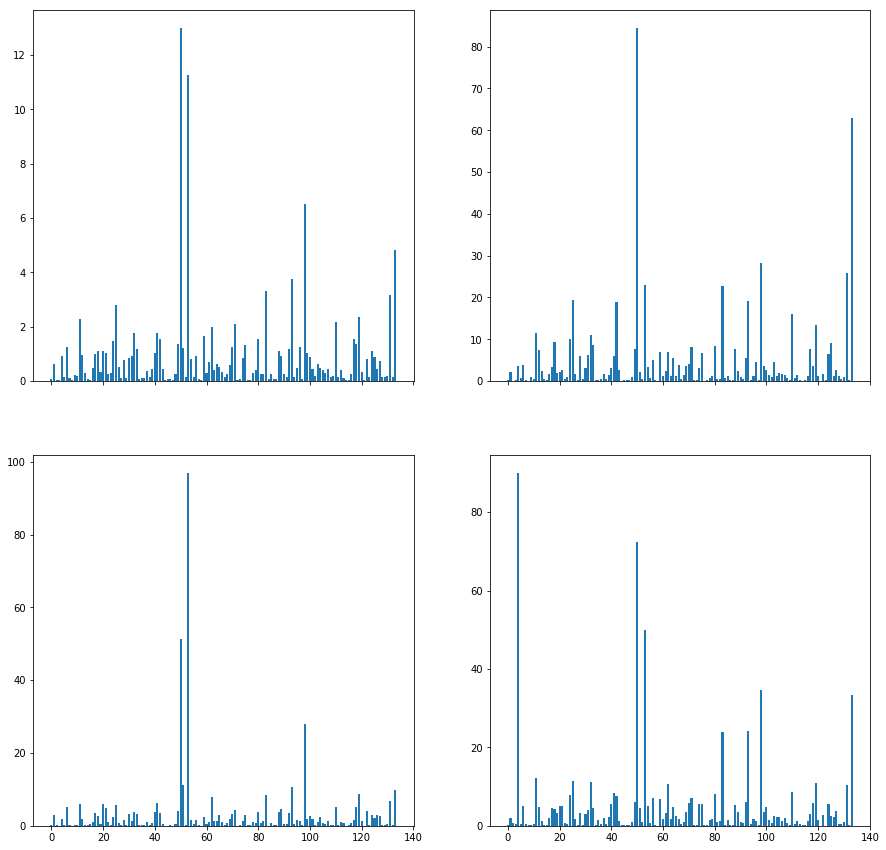

In [22]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

In [23]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
HTML(cluster_means.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,12.997293,11.264617,6.532016,4.838682,3.754675,3.303355,3.168569,2.782964
1,84.445473,22.891787,28.129081,62.984685,19.042915,22.726523,25.795860,19.449680
2,51.419980,96.941836,27.925411,9.926398,10.646082,8.353379,6.770039,5.795979
3,72.334056,50.059111,34.557484,33.242950,24.305315,23.996746,10.527657,11.457701


In [24]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,26.720216,23.158130,13.428710,9.947504,7.718970,6.791135,6.514038,5.721298
1,29.581621,8.019094,9.853741,22.063813,6.670817,7.961201,9.036403,6.813309
2,23.611072,44.513837,12.822815,4.558012,4.888477,3.835712,3.108672,2.661403
3,27.769415,19.217949,13.266795,12.762139,9.330935,9.212474,4.041622,4.398670


In [25]:
'''
4.
현재는 상위 8개 aisle에 대해서만 정리 되었는데 더 많은 물품에 대해 클러스터링 해 볼 수 있다고 함.


* Comments
- 위 커널처럼 분류를 해 본 것은 좋은 시도였다고 생각됨.
하지만 이걸 어떻게 쓸 지는 더 생각해볼 필요가 있음.

또한, 굳이 aisle 단위로 클러스터링을 할 필요가 있을까 생각됨..
실제 submission 파일은 product_id 단위로 예측해야 함.

'''

'\n현재는 상위 8개 aisle에 대해서만 정리 되었는데 더 많은 물품에 대해 클러스터링 해 볼 수 있다고 함.\n\n\n* Comments\n- 위 커널처럼 분류를 해 본 것은 좋은 시도였다고 생각됨.\n하지만 이걸 어떻게 쓸 지는 더 생각해볼 필요가 있음.\n\n또한, 굳이 aisle 단위로 클러스터링을 할 필요가 있을까 생각됨..\n실제 submission 파일은 product_id 단위로 예측해야 함.\n\n'